# Notebook Overview:
...

In [50]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os

## Data Collection

In [13]:
# Install Kaggle CLI
!pip install kaggle

In [61]:
# Download Kaggle dataset to cwd
!kaggle datasets download -d wkirgsn/electric-motor-temperature -p data/ --unzip


  0%|          | 0.00/117M [00:00<?, ?B/s]
  1%|          | 1.00M/117M [00:00<00:50, 2.41MB/s]
  3%|2         | 3.00M/117M [00:00<00:17, 6.73MB/s]
  5%|5         | 6.00M/117M [00:00<00:09, 12.7MB/s]
  9%|8         | 10.0M/117M [00:00<00:05, 19.2MB/s]
 11%|#1        | 13.0M/117M [00:00<00:05, 18.2MB/s]
 14%|#3        | 16.0M/117M [00:01<00:05, 20.9MB/s]
 16%|#6        | 19.0M/117M [00:01<00:04, 22.8MB/s]
 19%|#8        | 22.0M/117M [00:01<00:04, 22.3MB/s]
 21%|##1       | 25.0M/117M [00:01<00:04, 21.9MB/s]
 24%|##4       | 28.0M/117M [00:01<00:04, 22.2MB/s]
 27%|##6       | 31.0M/117M [00:01<00:04, 21.9MB/s]
 29%|##9       | 34.0M/117M [00:01<00:03, 22.1MB/s]
 32%|###1      | 37.0M/117M [00:02<00:03, 22.5MB/s]
 34%|###4      | 40.0M/117M [00:02<00:03, 22.9MB/s]
 37%|###6      | 43.0M/117M [00:02<00:03, 21.7MB/s]
 39%|###9      | 46.0M/117M [00:02<00:03, 21.0MB/s]
 42%|####2     | 49.0M/117M [00:02<00:03, 20.6MB/s]
 44%|####3     | 51.0M/117M [00:02<00:03, 19.3MB/s]
 45%|####5     | 53.

In [12]:
# Read csv
filepath = '..\data\measures_v2.csv'
#for chunk in pd.read_csv(filepath, chunksize=1000):
data = pd.read_csv(filepath)

In [13]:
# Print csv shape to see what we're working with
print(data.shape)

(1330816, 13)


# Data Definition

In [29]:
# Get a summary of the data: column names, data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB
None


In [32]:
# Check for None values
print(data.isna().any())

u_q               False
coolant           False
stator_winding    False
u_d               False
stator_tooth      False
motor_speed       False
i_d               False
i_q               False
pm                False
stator_yoke       False
ambient           False
torque            False
profile_id        False
dtype: bool


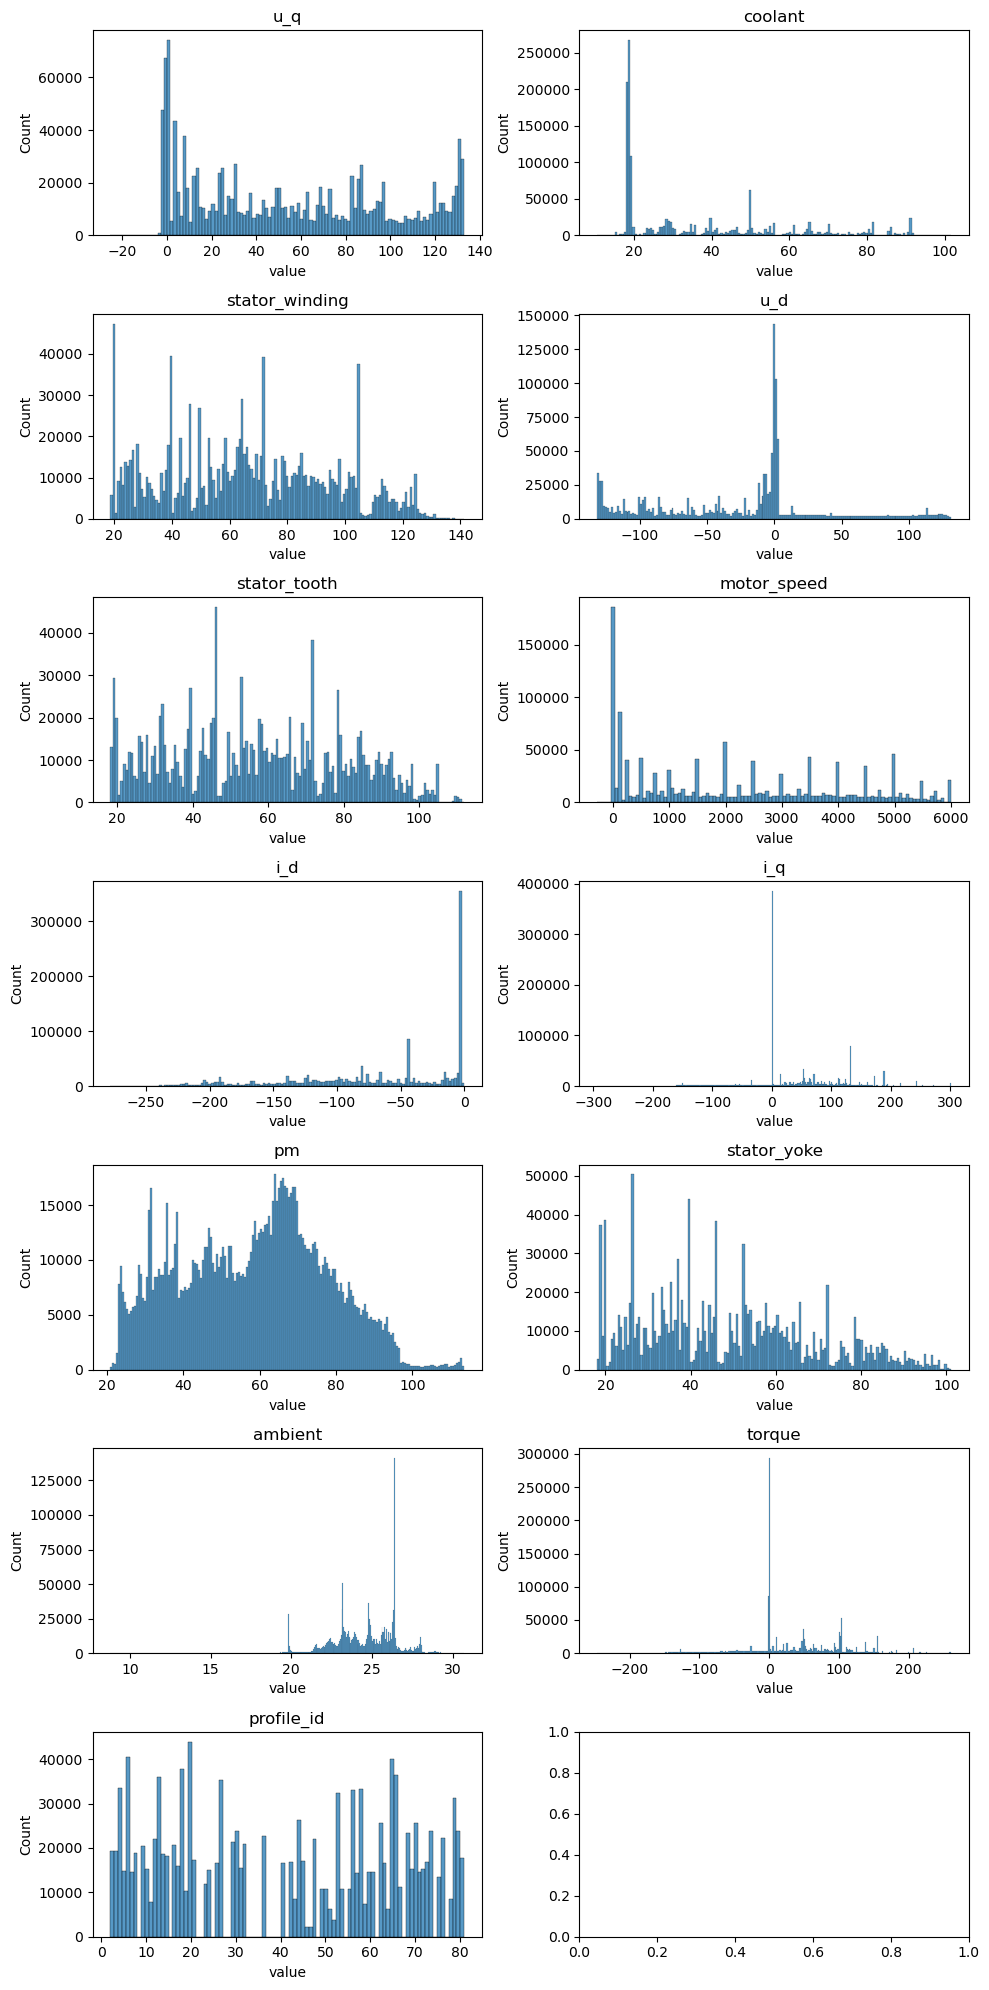

In [80]:
# View distribution of variable data
nrows = 7
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 20))

ind1 = 0
ind2 = 0
for var in data.columns:
    # plot
    sns.histplot(ax=axes[ind2,ind1], data=data[var])
    axes[ind2,ind1].set_title(var)
    axes[ind2,ind1].set_xlabel('value')
    
    if ind1 < ncols - 1:
        ind1 += 1 # increment col
    else:
        ind1 = 0 # reset
        ind2 += 1 # increment row

fig.tight_layout()
plt.show()

# Data Cleaning

# Save File